# 05. 시계열 회귀 모델

이 장에서는 회귀 모델(regression model)을 다룹니다. 시계열 $y$을 예측할 때 이것이 다른 시계열 $x$와 선형 관계가 있다고 가정하는 것이 기본 개념입니다.

예를 들면, 전체 광고 비용 $x$을 예측변수(predictor variable)로 두고 월별 판매량 $y$을 예측하는 상황이 있을 수 있습니다. 또는 온도 $x_1$과 요일 $x_2$을 예측변수로 사용하여 일별 전력 수요 $y$를 예측하는 상황이 있을 수 있습니다.

목표 예상변수(forecast variable) $y$는 때때로 회귀선, 종속 변수, 또는 피설명 변수라고 부르기도 합니다. 예측변수(predictor variables) $x$는 종종 회귀자, 독립 변수, 설명 변수라고 부르기도 합니다. 이 책에서는 항상 $y$를 “목표 예상(forecast)”변수로 $x$를 “예측(predictor)”변수로 부를 것입니다.

<br>

## 05.01. 선형 모델

<br>

### 단순 선형 회귀

가장 간단한 경우에는, 회귀 모델이 목표 예상변수(forecast variable) $y$와 하나의 예측변수(predictor variable) $x$사이의 선형 관계를 다룹니다.

$$y_t = \beta_0 + \beta_1 x_t + \varepsilon_t.$$

계수 $β_0$와 $β_1$는 각각 직선의 절편과 기울기를 나타냅니다. 절편 $β_0$은 $x=0$에서 $y$의 예측값을 나타냅니다. 기울기 $β_1$는 $x$ 가 1만큼 증가했을 때 $y$의 예측된 변화를 의미합니다.

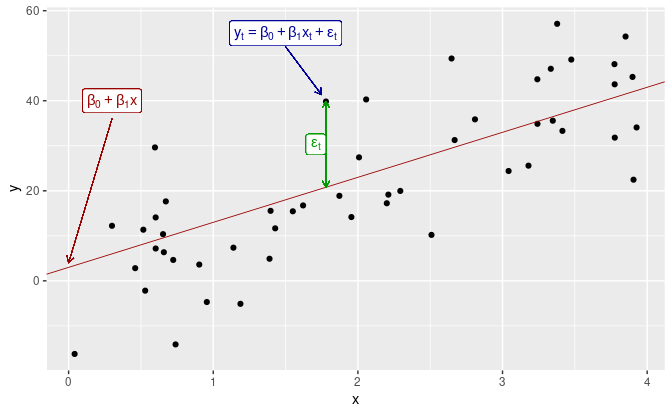

관측값이 직선 위에 놓인 것이 아니라 주위에 퍼져있다는 것에 주목하시길 바랍니다. 모델의 체계적인(systematic) 부분 또는 설명된(explained) 부분을 포함하는 각 관측값 $y_t$, $\beta_0+\beta_1x_t$ 무작위 “오차(error)”$ε_t$를 생각해볼 수 있습니다. “오차(error)”라는 단어는 실수를 의미하는 것이 아니라, 관측값이 기본 직선 모델로부터 얼마나 떨어져 있는지를 의미합니다.

<br>

### 예제: 미국 소비 지출

 1970 Q1부터 2016 Q3까지 미국의 실제 개인 소비 지출(real personal consumption expenditure),  $y$, 과 실제 개인 가처분소득(real personal disposable income), $x$,의 분기별 백분율 변화량 시계열을 나타냅니다.

In [8]:
library(patchwork)
library(tidyverse)
library(fpp3)
library(fpp2)
library(fpp)
library(forecast)

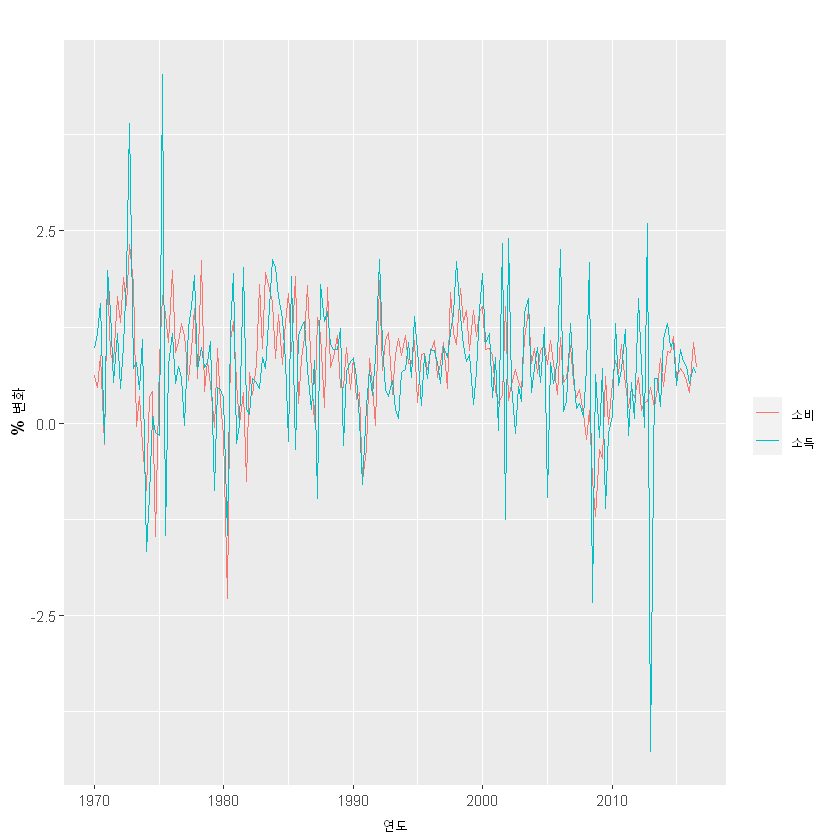

In [11]:
colnames(uschange)[1:2] <- c("소비", "소득")

autoplot(uschange[,c("소비", "소득")]) +
  ylab("% 변화") + xlab("연도") +
  guides(colour=guide_legend(title=" "))

$$\hat{y}_t=0.55 + 0.28x_t.$$

`geom_smooth()` using formula = 'y ~ x'


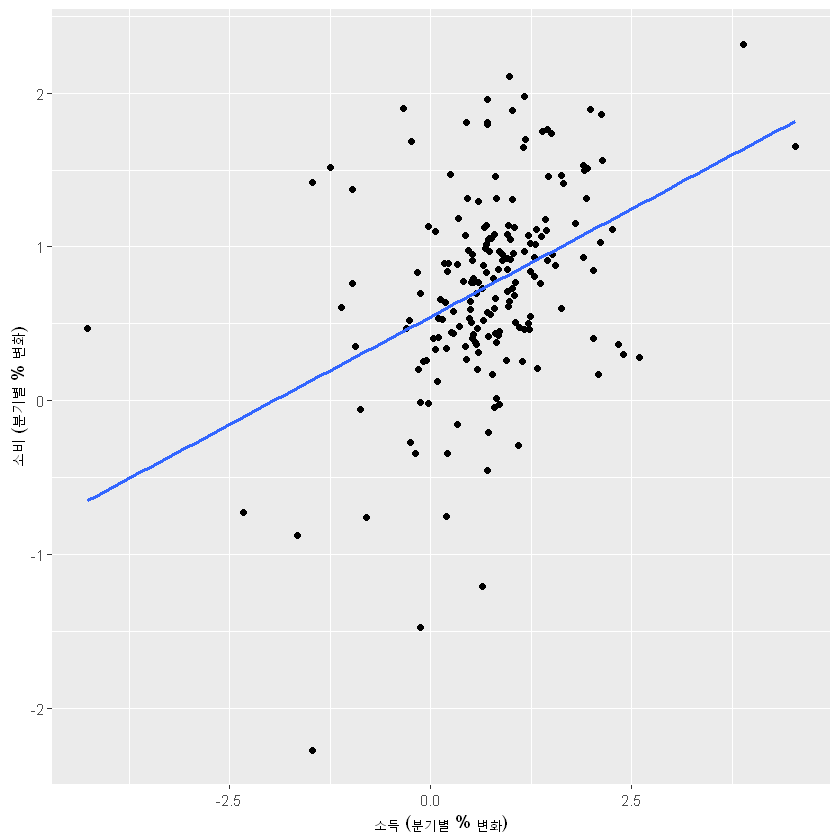

In [12]:
data(uschange)

uschange %>%
  as.data.frame() %>%
  ggplot(aes(x=Income, y=Consumption)) +
    ylab("소비 (분기별 % 변화)") +
    xlab("소득 (분기별 % 변화)") +
    geom_point() +
    geom_smooth(method="lm", se=FALSE)

In [13]:
tslm(Consumption ~ Income, data=uschange)


Call:
tslm(formula = Consumption ~ Income, data = uschange)

Coefficients:
(Intercept)       Income  
     0.5451       0.2806  


적합선(fitted line)은 양(+)의 기울기를 갖습니다. 이는 소득과 소비 사이의 양의 관계를 반영합니다. 기울기 계수는 $x$가 1만큼 증가할 때(개인 가처분 소득이 1퍼센트 증가할 때) $y$가 평균적으로 증가하는 것(개인 소비 지출이 평균적으로 0.28퍼센트 증가하는 것)을 나타냅니다. 추정된 식은 $x$값 1이(개인 가처분 소득의 백분율 증가) $y$에 대한 예측값 **0.55 + 0.28 ×1 = 0.83** (개인 소비 지출의 백분율 증가)으로 이어지는 것을 나타내기도 합니다.

$x=0$ 값이 이해되어야 Y절편을 해석할 수 있습니다. $x=0$일 때(즉, 마지막 분기부터 개인 가처분 소득에 변화가 없을 때), $y$의 예측된 값은 0.55 (즉, 개인 소비 지출 평균 증가량 0.55%) 입니다. $x=0$이 이해되지 않을 때도, Y절편은 모델에서 중요한 부분입니다. Y절편 없이는 기울기 계수가 불필요하게 왜곡될 수 있습니다. “원점을 지나는” 회귀선이라는 제한 조건이 없어도 Y절편은 항상 포함되어야 합니다. 지금부터는 모델에 Y절편이 항상 포함되어있다고 가정합니다.

<br>

### 다중 선형 회귀

두 개 이상의 예측변수(predictor variable)가 있을 때, 모델을 다중 회귀 모델(multiple linear regression)이라고 부릅니다. 다중 회귀 모델의 일반적인 형태는 다음과 같습니다.

$$\begin{equation}
  y_t = \beta_{0} + \beta_{1} x_{1,t} + \beta_{2} x_{2,t} + \cdots + \beta_{k} x_{k,t} + \varepsilon_t,
  \
\end{equation}$$

여기에서 $y$는 예측될 목표 예상변수(forecast variable)이고, $x_{1},\dots,x_{k}$들은 $k$개의 예측변수(predictor variable)입니다. 예측변수(predictor variable) 각각은 숫자 형태이어야만 합니다. 계수 $\beta_{1},\dots,\beta_{k}$은 모델에서 다른 모든 예측변수(predictor variable)의 효과를 고려한 후의 각 예측변수의 효과를 나타냅니다. 따라서, 계수는 예측변수(predictor variable)의 한계 효과(marginal effects)를 나타냅니다.

<br>

### 예제: 미국 소비 지출

그림은 미국 소비 지출 예측에 유용할 수 있는 추가적인 예측변수(predictor vvariable)를 나타냅니다. 이러한 예측변수(predictor variable)에는 산업 생산, 개인 저축의 분기별 백분율 변화, 분기별 실업률(이것은 정의상 백분율) 변화 등이 있습니다. 소비 지출이 개인 소득에만 의존하는 것이 아니라 다른 예측변수(predictor variable)에도 의존할 것이라고 예상하는 것처럼, 다중 선형 회귀 모델을 세우는 것은 잠재적으로 더 정확한 예측값을 낼 수 있습니다.

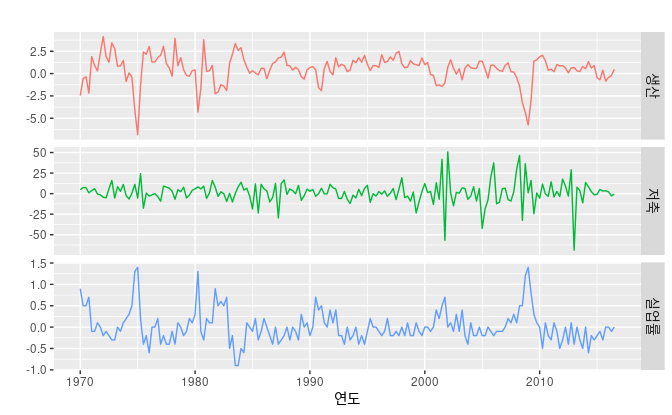

<br>

5개 변수의 산점도 행렬(scatterplot matrix)입니다. 첫 번째 열은 목표 예상변수-forecast variable-(소비; consumption)와 각 예측변수(predictor variable) 사이의 관계를 나타냅니다. 산점도(scatter plot)는 소득과 산업 생산과의 양의 관계, 저축과 실업률과의 음의 관계를 나타냅니다. 이러한 관계의 강도는 첫 번째 행에 따라 상관 계수(correlation coefficient)로 나타내었습니다. 나머지 산점도와 상관 계수(correlation coefficient)는 예측변수(predictor variable) 사이의 관계를 나타냅니다.

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



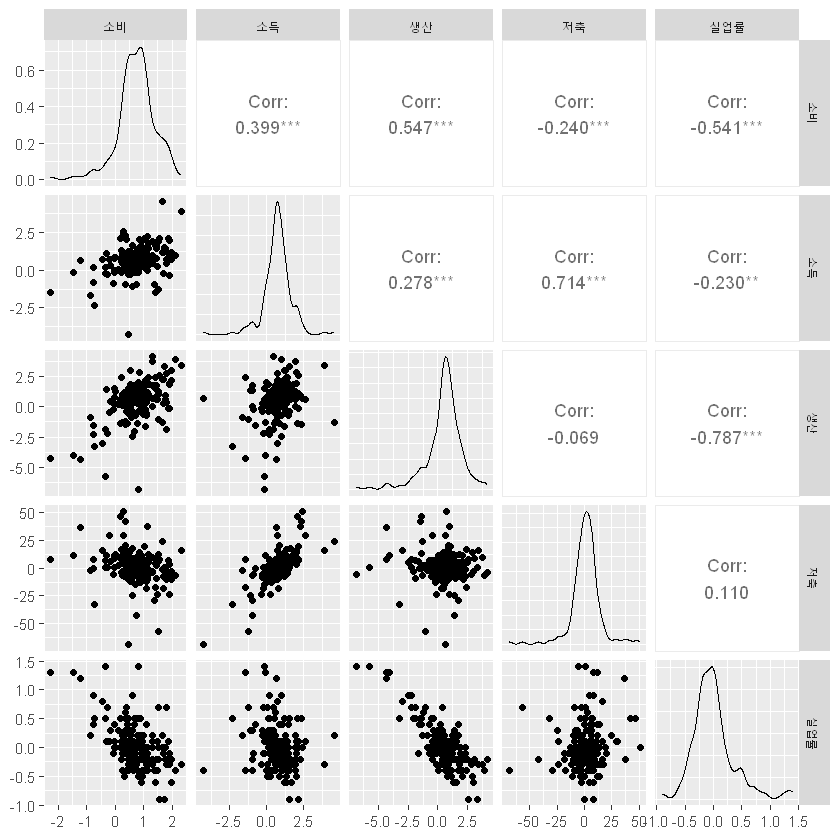

In [14]:
colnames(uschange) <- c("소비", "소득", "생산", "저축", "실업률")
uschange %>%
  as.data.frame() %>%
  GGally::ggpairs()

<br>

### 선형회귀분석의 가정

**첫 번째, 모델은 현실에 대한 타당한 근사식이고; 즉, 목표 예상변수(forecast variable)와 예측변수(predictor variable) 사이의 관계는 이러한 선형 관계식을 만족한다는 것입니다.** (선형성)

**두 번째, 오차(error)  $(\varepsilon_{1},\dots,\varepsilon_{T})$에 대해 다음과 같은 가정을 사용합니다:**

* **오차의 평균은 0입니다; 그렇지 않으면, 예측값이 체계적으로 편향될 것입니다.** (오차 정규성)
* **오차에는 자기상관관계(autocorrelation)가 없습니다; 그렇지 않으면, 데이터에 악용될 수 있는 정보가 더 많아서 예측값이 비효율적으로 될 것입니다.** (오차 독립성)
* **오차는 예측변수(predictor variable)와 상관관계(correlation)가 없습니다; 그렇지 않은 경우에는 모델의 체계적인 부분에 포함되어야 할 정보가 더 있을 수 있습니다.** (오차 독립성)


**예측 구간(prediction interval)을 쉽게 내기 위해 오차가 일정한 분산값 $σ_2$을 가지는 정규 분포(normal distribution)를 나타낸다고 가정하는 것도 유용합니다.** (오차 등분산성)

선형 회귀 모델에서 또 하나의 중요한 가정은 각 예측변수(predictor variable) $x$는 확률 변수(random variable)가 아니라는 것입니다. 실험실에서 통제된 실험을 하고 있는 상황에서는, 각 $x$값을 통제할 수 있고 (그래서 무작위적일 수 없습니다) 결과 $y$값을 관측할 수 있습니다. (비즈니스 및 경제 분야의 대부분의 데이터를 포함한) 관측 데이터로 $x$값을 통제하는 것은 불가능하고 단순히 관측할 뿐입니다. 따라서 이러한 가정을 사용합니다.

<br>

## 05.02. 최소 제곱 추정

물론 실제로는 관측값을 가지고 있지만 계수 값 $\beta_0,\beta_1, \dots, \beta_k$ 은 모릅니다. 이러한 값은 데이터로부터 추정해야 합니다.

최소 제곱 원리(least square principle)는 제곱 오차의 합을 최소화하여 계수를 효과적으로 선택할 수 있는 방법입니다. 즉, 아래 값을 최소화하는 $\beta_0,\beta_1, \dots, \beta_k$값을 선택합니다.

$$\sum_{t=1}^T \varepsilon_t^2 = \sum_{t=1}^T (y_t -
  \beta_{0} - \beta_{1} x_{1,t} - \beta_{2} x_{2,t} - \cdots - \beta_{k} x_{k,t})^2.$$
  
**오차를 제곱하여 더한 양의 최소값을 나타내기 때문에 이것을 “최소 제곱(least square)” 추정이라고 부릅니다.** 계수의 가장 좋은 추정치를 찾는 것을, 종종 모델을 데이터에 “맞춘다”고 부르거나, 때때로 모델을 “학습(learning)”시키거나 “훈련(training)”시킨다고 부릅니다. 

<br>

### 예제: 미국 소비 지출

미국 소비 데이터를 다루는 다중 선형 회귀 모델은 다음과 같습니다.

$$y_t=\beta_0 + \beta_1 x_{1,t}+ \beta_2 x_{2,t}+ \beta_3 x_{3,t}+ \beta_4 x_{4,t}+\varepsilon_t,$$

여기에서 $y$는 실제 개인 소비 지출의 백분율 변화, $x_1$은 실제 개인 가처분 소득의 백분율 변화, $x_2$는 산업 생산의 백분율 변화, $x_3$은 개인 저축의 백분율 변화, $x_4$는 실업률 변화입니다.

다음의 출력은 적합 모델(fitted model)에 관한 정보를 나타냅니다. 

**계수(coefficients)의 첫 번째 열은 각 $β$ 계수의 추정을,**

**두 번째 열은 $β$의 표준 오차(즉, 비슷한 데이터에 대해 $β$계수를 반복적으로 추정하여 얻을 수 있는 표준 편차)입니다.**

**표준 오차는 추정된 $β$ 계수의 불확실성을 나타냅니다**

In [20]:
data(uschange)
uschange %>% colnames
uschange %>% head

[1] "Consumption"  "Income"       "Production"   "Savings"      "Unemployment"

,Consumption,Income,Production,Savings,Unemployment
1970 Q1,0.6159862,0.9722610,-2.4527003,4.8103115,0.9
1970 Q2,0.4603757,1.1690847,-0.5515251,7.2879923,0.5
1970 Q3,0.8767914,1.5532705,-0.3587079,7.2890131,0.5
1970 Q4,-0.2742451,-0.2552724,-2.1854549,0.9852296,0.7
1971 Q1,1.8973708,1.9871536,1.9097341,3.6577706,-0.1
1971 Q2,0.9119929,1.4473342,0.9015358,6.0513418,-0.1


In [19]:
fit.consMR <- tslm(Consumption ~ Income + Production + Unemployment + Savings,
                   data=uschange)

summary(fit.consMR)


Call:
tslm(formula = Consumption ~ Income + Production + Unemployment + 
    Savings, data = uschange)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88296 -0.17638 -0.03679  0.15251  1.20553 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.26729    0.03721   7.184 1.68e-11 ***
Income        0.71449    0.04219  16.934  < 2e-16 ***
Production    0.04589    0.02588   1.773   0.0778 .  
Unemployment -0.20477    0.10550  -1.941   0.0538 .  
Savings      -0.04527    0.00278 -16.287  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3286 on 182 degrees of freedom
Multiple R-squared:  0.754,	Adjusted R-squared:  0.7486 
F-statistic: 139.5 on 4 and 182 DF,  p-value: < 2.2e-16


예측할 때 마지막 두 열은 별로 중요하지 않습니다. “t 값”은 추정된 $β$ 계수와 표준 오차의 비율을, 마지막 열은 p-값을 나타냅니다. 여기에서 p-값은 관련 예측변수(predictor variable)와 소비 사이에 실제 관계가 없는 경우에, 추정된 $β$계수가 원래 값만큼 클 확률입니다. 이 값은 각 예측변수의 효과를 살펴볼 때 유용하지만, 예측할 때는 그렇게 유용하진 않습니다.

<br>

### 적합값

회귀식에서 추정된 계수를 사용하고 오차항을 0으로 두어 $y$의 예측값을 얻을 수 있습니다. 일반적으로 다음과 같이 적습니다.

$$\begin{equation}
  \hat{y}_t = \hat\beta_{0} + \hat\beta_{1} x_{1,t} + \hat\beta_{2} x_{2,t} + \cdots + \hat\beta_|tag{5.2}
\end{equation}$$

$x_{1,t},\dots,x_{k,t}$, for $t=1,\dots,T$  값을 대입하면 학습-표본 안의 $y_t$예측값을 얻습니다. 이 예측값을 적합값(fitted value)이라고 부릅니다. $y$의 참 미래 예측값이 아니고 모델을 추정하기 위해 사용한 데이터의 예측값이라는 것에 주목하시길 바랍니다.

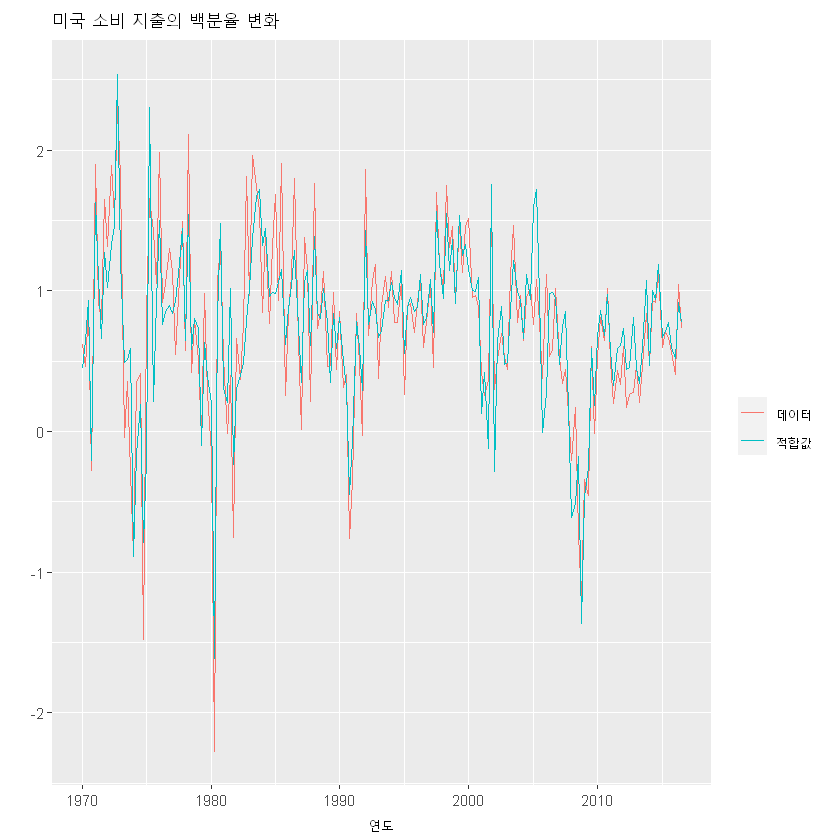

In [21]:
autoplot(uschange[,'Consumption'], series="데이터") +
  autolayer(fitted(fit.consMR), series="적합값") +
  xlab("연도") + ylab("") +
  ggtitle("미국 소비 지출의 백분율 변화") +
  guides(colour=guide_legend(title=" "))

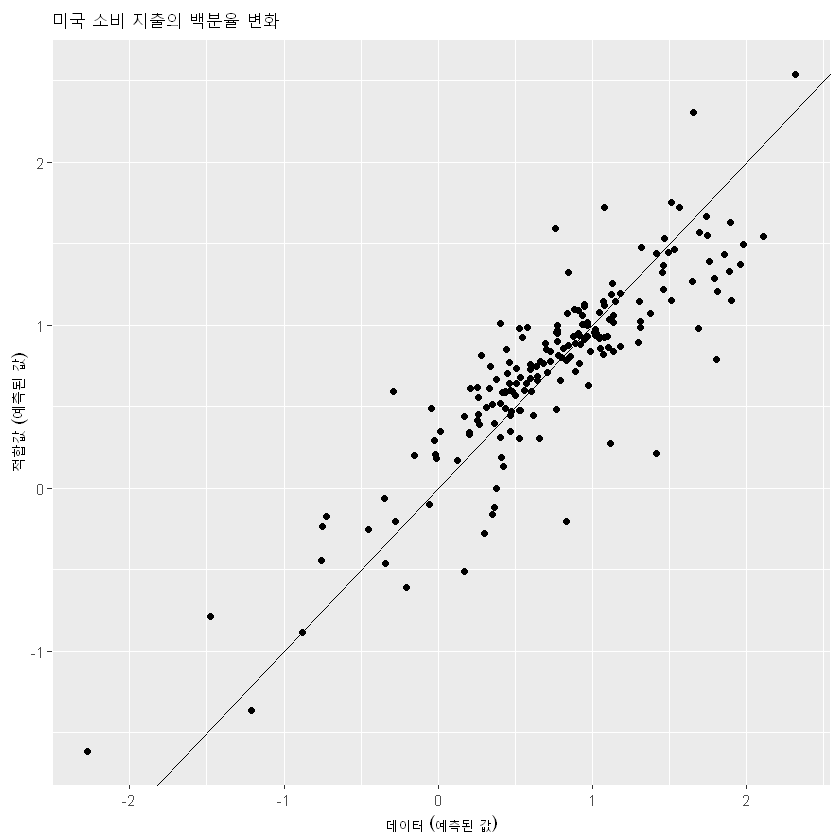

In [22]:
cbind(Data = uschange[,"Consumption"],
      Fitted = fitted(fit.consMR)) %>%
  as.data.frame() %>%
  ggplot(aes(x=Data, y=Fitted)) +
    geom_point() +
    ylab("적합값 (예측된 값)") +
    xlab("데이터 (예측된 값)") +
    ggtitle("미국 소비 지출의 백분율 변화") +
    geom_abline(intercept=0, slope=1)

<br>

### 적합도(Goodness-of-fit)

선형 회귀 모델이 데이터에 얼마나 잘 맞는지 요약하는 일반적인 방법은 결정 계수(coefficient of determination) 또는  $R^2$를 사용하는 것입니다. 이것은 관측한 $y$  값과 예측한 $\hat{y}$값 사이의 상관 관계(correlation)의 제곱으로 계산할 수 있습니다. 대신에, 다음과 같이 계산할 수도 있습니다.

$$R^2 = \frac{\sum(\hat{y}_{t} - \bar{y})^2}{\sum(y_{t}-\bar{y})^2},$$

여기에서 합산 기호는 모든 관측값에 대한 것입니다. 따라서, 회귀 모델로 설명되는 목표 예상변수(forecast variable)의 변동 비율을 반영합니다.

단순 선형 회귀 분석에서, $R^2$값은 $y$와 $x$사이의 상관 관계의 제곱과 같습니다(포함된 절편이 있는 경우).

예측값이 실제 값과 가깝다면, $R^2$는 1에 가까울 것입니다. 반면에, 예측값이 실제 값과 관련이 없다면(다시 말해, 절편이 있다고 가정하면), $R^2=0$입니다. 모든 경우에 $R^2$는 0과 1 사이의 값을 갖습니다.

예측 작업에서 $R^2$값은 종종 잘못 사용되긴 하지만 자주 사용됩니다. **여분의 예측변수(predictor variable)를 모델에 추가할 때 $R^2$ 값은 절대로 줄어들지 않고, 이것이 과대적합(over-fitting)으로 이어질 수 있습니다.**

좋은 $R^2$값에 대해 정해진 규칙은 없으며 $R^2$의 일반적인 값은 사용하는 데이터의 종류에 따라 다릅니다. 테스트 데이터에 대해 모델의 예측 성능을 확인하는 것이 학습 데이터(training data)에 대한 $R^2$를 측정하는 것보다 훨씬 낫습니다.

<br>

### 회귀 분석의 표준 오차

모델이 데이터에 얼마나 잘 들어 맞았는지에 대한 또 다른 척도는 **“잔차 표준 오차(residual standard error)”라고 하는 잔차(residual)의 표준 편차입니다.** 이것은 0.3286 값으로 위의 출력 결과에 나와있습니다.

이것은 다음의 식으로 계산합니다.

$$\begin{equation}
  \hat{\sigma}_e=\sqrt{\frac{1}{T-k-1}\sum_{t=1}^{T}{e_t^2}}.
  \
\end{equation}$$

여기에서 $k$는 모델에 포함된 예측변수(predictor variable)의 수입니다. 잔차(residual)를 계산할 때 $k+1$개의 매개변수(각 예측변수에 대한 절편과 계수)를 추정했기 때문에  $T−k−1$로 나누는 것에 주목하시길 바랍니다.

**표준 오차는 모델이 내는 평균 오차의 크기와 관련이 있습니다.** 이 오차를 $y$의 표본 평균이나 모델의 정확도에 대해 몇 가지 파악하기 위해 $y$의 표준 편차와 비교할 수 있습니다.

**표준 오차를 평가하는 것이 눈금(scale)에 따라 매우 주관적일 수 있다는 것에 반드시 주의하시길 바랍니다.**

<br>

## 05.03 회귀 모델 평가

관측된 $y$ 값과 해당하는 적합값 $\hat{y}$사이의 차이값은 $t=1,\dots,T$에 대해 다음과 같이 학습-모음 오차 또는 “잔차(residual)”로 정의합니다.

$$\begin{align*}
  e_t &= y_t - \hat{y}_t \\
      &= y_t - \hat\beta_{0} - \hat\beta_{1} x_{1,t} - \hat\beta_{2} x_{2,t} - \cdots - \hat\beta_{k} x_{k,t}
\end{align*}$$

각 잔차(residual)는 관련된 관측값의 예측할 수 없는 성분입니다.

잔차(residual)에는 다음 두 가지를 포함하여 몇 가지 유용한 성질이 있습니다:

$$\sum_{t=1}^{T}{e_t}=0 \quad\text{and}\quad \sum_{t=1}^{T}{x_{k,t}e_t}=0\qquad\text{for all $k$}.$$

**이러한 성질의 결과로, 잔차(residual)의 평균이 0이고 잔차(residual)와 예측변수(predictor variable)에 대한 관측값 사이의 상관관계(correlation)도 0이라는 것이 분명합니다. (Y절편이 모델에서 생략될 때, 이것이 반드시 참은 아닙니다.)**

회귀 변수를 고르고 회귀 모델을 맞춘 후에, 모델의 가정이 만족되는지 확인하기 위해 잔차를 그려보는 것이 필요합니다. 적합 모델(fitted model)과 기본 가정의 서로 다른 측면을 확인하기 위해 그려야 할 여러 가지 그래프가 있습니다. 각각을 하나씩 살펴보겠습니다.

<br>

### 잔차의 ACF 그래프

시계열 데이터에서, 현재 시점에 관측한 변수의 값은 이전 기간의 값과 비슷하거나 그보다 이전 기간의 값과 비슷할 것입니다. **따라서 회귀 모델로 시계열 데이터를 맞출 때, 보통은 잔차의 자기상관(autocorrelation)을 찾는 작업을 합니다.이 경우에, 추정된 모델 오차에서 자기상관관계(autocorrelation)가 없다는 가정을 위배하여 예측이 비효율적일 수 있습니다.** 

이것은 더 나은 예측을 위해 모델에서 고려해야 할 정보가 더 있다는 것을 의미합니다. **자기상관(autocorrelation)을 가지는 오차가 있는 모델로 낸 예측치는 여전히 편향되어있지는 않아서 “잘못된” 것은 아니지만, 보통 필요한 것보다 더 큰 예측구간(prediction interval)을 가질 것입니다. 따라서 항상 잔차의 ACF (AutoCorrelation Function) 그래프를 살펴봐야 합니다.**

**회귀 모델을 고려하여 설계한 잔차(residual)의 자기상관(autocorrelation)을 확인하는 유용한 또 다른 방법은 브로이쉬-갓프레이(Breusch-Godfrey)** 검정입니다. 이 방법은 계열 상관(serial correlation)에 대한 LM (Lagrange Multiplier) 검정이라고도 합니다. **이것은 어떤 특정한 순서까지 잔차에 자기상관(autocorrelation)이 없다는 결합 가설(joint hypothesis)을 검증하는데 사용합니다. 작은 p-값은 잔차(residual)에 중요한 자기상관(autocorrelation)이 남아 있다는 것을 나타냅니다.**

**브로이쉬-갓프레이(Breusch-Godfrey) 검정은 융-박스(Ljung-Box) 검정과 비슷합니다만, 회귀 모델을 위해 설계되었다는 점이 구체적인 차이입니다.**

<br>

### 잔차의 히스토그램

잔차가 정규 분포를 따르는지 항상 확인하는 것은 좋은 접근 방식입니다. 이전에 설명한 것처럼, 이러한 작업은 예측 작업에서 필수적인 것은 아닙니다만, 이를 통해 예측 구간(prediction interval)을 훨씬 쉽게 계산할 수 있게 됩니다.

<br>

* **p-value < 0.05 $\rightarrow$ 귀무가설 기각 $\rightarrow$ 잔차에 중요한 자기상관성 존재**

<br>

시간 그래프(time plot), ACF와, 미국 분기별 소비 데이터에 맞춘 다중 회귀 모델로 얻은 잔차의 히스토그램과, 그리고 8차 자기 상관까지 확인하기 위한 브로이쉬-갓프레이(Breusch-Godfrey) 검정 결과


	Breusch-Godfrey test for serial correlation of order up to 8

data:  Residuals from Linear regression model
LM test = 14.874, df = 8, p-value = 0.06163


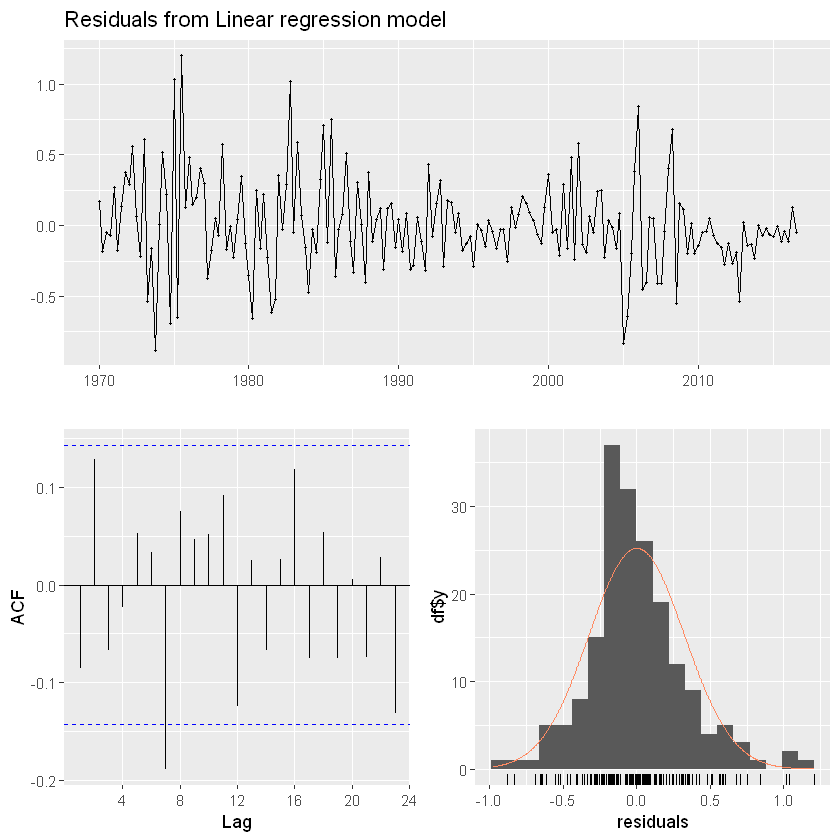

In [23]:
checkresiduals(fit.consMR)

**checkresiduals() 함수는 회귀 모델에 대해서는 브로이쉬-갓프레이(Breusch-Godfrey) 검정을 사용하고 다른 경우에는 융-박스(Ljung-Box) 검정을 사용할 것입니다.**

**시간 그래프(time plot)에서 몇몇 부분은 시간에 따라 변하지만 나머지는 상대적으로 두드러지진 않습니다. 이러한 이분산성(heteroskedasticity)이 예측 구간 범위를 정확하지 않게 만들 수도 있습니다.**

**히스토그램은 잔차가 살짝 치우친 것 같다는 것을 보여줍니다. 이것은 예측 구간의 범위 확률에 영향을 줄 수도 있습니다.**

**자기상관(autocorrelation) 그래프에서는 시차 7에서 유의미하게 튀는 점이 나타나지만 브로이쉬-갓프레이(Breusch-Godfrey) 검정에서 5% 수준에 도달할만큼 유의미하지는 않습니다.** 

어쨌든, 자기상관(autocorrelation)이 그렇게 크지 않고, 시차 7에서 나타나는 것이 예측값이나 예측구간(prediction interval)에 영향을 주진 않을 같습니다.

<br>

### 예측변수에 대한 잔차 그래프

**잔차가 체계적인 패턴을 보이지 않고 무작위로 흩뿌려진 형태로 나타날 것 같습니다. 이것을 확인하는 단순하고 빠른 방식은 각 예측변수(predictor variable)에 대한 잔차(residual)의 산점도(scatterplot)를 살펴보는 것입니다. 이러한 산점도(scatterplot)에 패턴이 나타나면, 관계가 비선형적일 수 있어서 그에 따라 모델을 수정해야합니다.**

**모델에 없는 모든 예측변수(predictor variable)에 대해 잔차(residual)를 그리는 것도 필요합니다. 이 중 어떤 것에서 패턴이 나타난다면 (아마도 비선형 형태의 패턴), 관련된 예측변수(predictor variable)를 모델에 넣어야 할 것입니다.**

In [24]:
df <- as.data.frame(uschange)
df[,"Residuals"]  <- as.numeric(residuals(fit.consMR))

In [25]:
df %>% head

,Consumption,Income,Production,Savings,Unemployment,Residuals
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.6159862,0.9722610,-2.4527003,4.8103115,0.9,0.16863763
2,0.4603757,1.1690847,-0.5515251,7.2879923,0.5,-0.18459088
3,0.8767914,1.5532705,-0.3587079,7.2890131,0.5,-0.05147238
4,-0.2742451,-0.2552724,-2.1854549,0.9852296,0.7,-0.07091595
5,1.8973708,1.9871536,1.9097341,3.6577706,-0.1,0.26775981
6,0.9119929,1.4473342,0.9015358,6.0513418,-0.1,-0.17730295


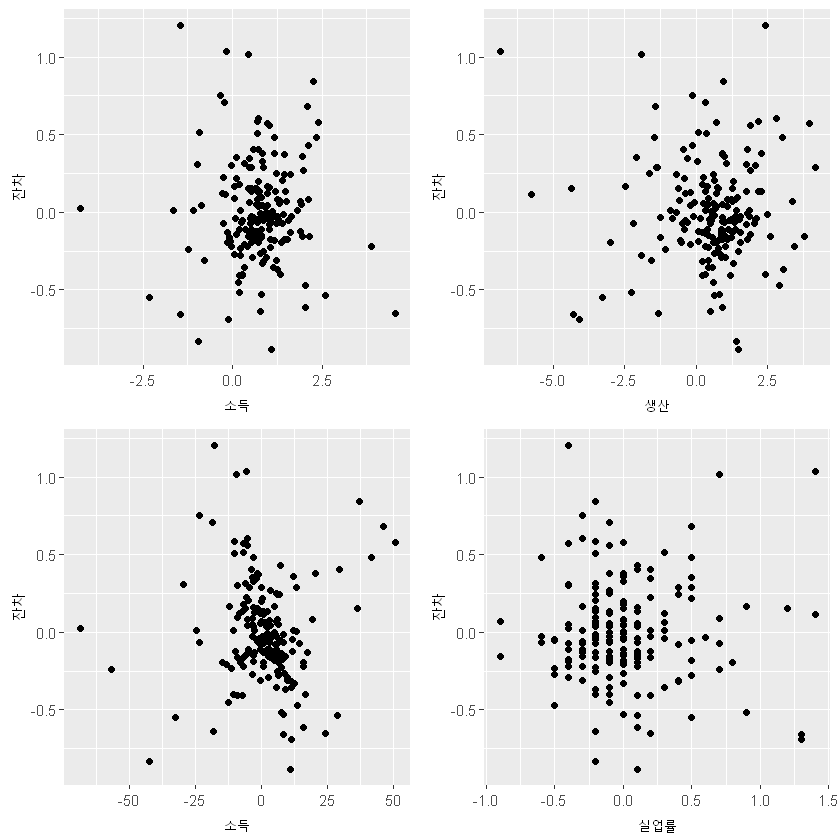

In [26]:
p1 <- ggplot(df, aes(x=Income, y=Residuals)) +
  geom_point() + xlab("소득") + ylab("잔차")
p2 <- ggplot(df, aes(x=Production, y=Residuals)) +
  geom_point() + xlab("생산") + ylab("잔차")
p3 <- ggplot(df, aes(x=Savings, y=Residuals)) +
  geom_point() + xlab("소득") + ylab("잔차")
p4 <- ggplot(df, aes(x=Unemployment, y=Residuals)) +
  geom_point() + xlab("실업률") + ylab("잔차")

gridExtra::grid.arrange(p1, p2, p3, p4, nrow=2)

<br>

### 적합값에 대한 잔차 그래프

**적합값에 대해 잔차를 그려도 어떠한 패턴도 나타나지 않아야 합니다. 패턴을 보았다면, 오차에 “이분산성(heteroscedasticity)”이 있을 수 있습니다. 이는 잔차의 분산이 일정하지 않을 수도 있다는 것을 의미합니다. 이러한 문제가 생기면, 목표 예상변수(forecast variable)에 로그나 제곱근 같은 변환을 취해야 할 수도 있습니다.**

<br>

**무작위 산점도는 오차에 등분산성(homoscedasity)이 있다는 것을 말해줍니다.**

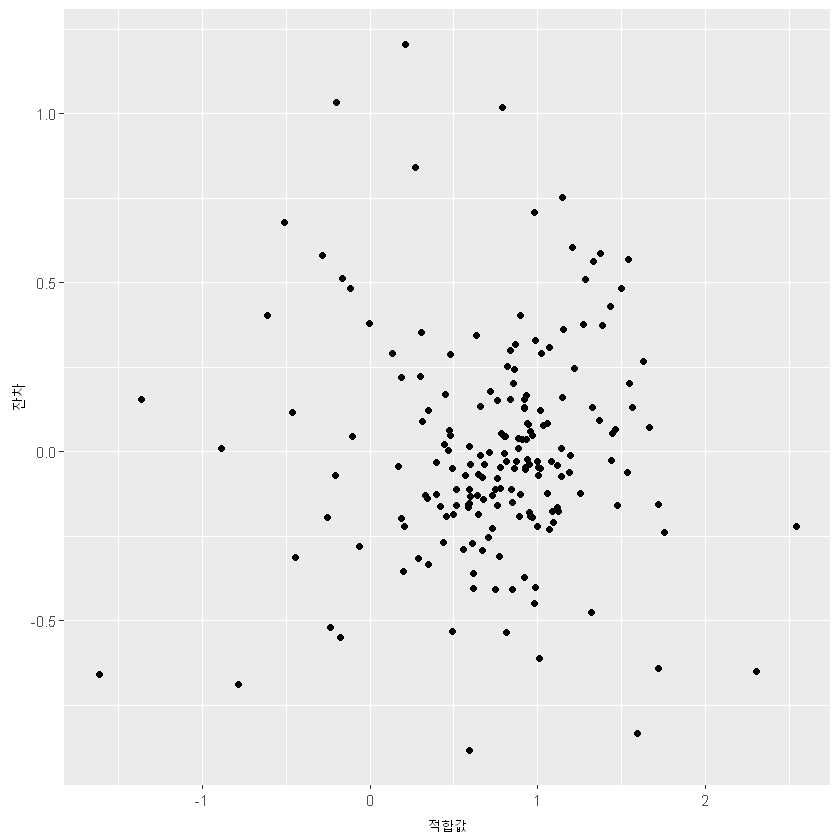

In [27]:
cbind(Fitted = fitted(fit.consMR),
      Residuals = residuals(fit.consMR)) %>%
  as.data.frame() %>%
  ggplot(aes(x=Fitted, y=Residuals)) + geom_point() +
    xlab("적합값") + ylab("잔차")

<br>

### 이상값과 영향력 있는 관측값

대다수의 데이터에 비해 극단적인 값을 갖는 관측값을 이상값(outliers)이라고 부릅니다. 회귀 모형의 추정된 계수에 큰 영향을 주는 관측값을 영향력 있는 관측값이라고 부릅니다. 보통, 영향력 있는 관측값은  $x$ 방향에서 극단적인 값을 갖는 이상값이기도 합니다.

이상값과 영향력 있는 관측값을 찾아내는 형식적인 방법이 있습니다. 이러한 방법은 이 책의 범위를 벗어납니다. 2 장의 처음 부분에서 이야기한 것처럼, 어떠한 분석을 하기 전에 데이터에 익숙해지는 것은 정말 중요합니다. 각 $x$에 대해  $y$를 산점도로 나타내는 것은 항상 회귀 분석의 좋은 시작점이고, 종종 특이한 관측값을 찾아내는데 도움이 되기도 합니다.

이상값이 나타나는 한 가지 원인은 데이터 입력 실수입니다. 데이터의 간단한 설명 통계로는 분별력이 없는 최소값과 최대값을 찾아낼 수 있습니다. 그러한 관측값을 찾았고, 잘못 입력했다는 것을 알았다면, 표본에서 바로 빼거나 수정해야합니다.

몇몇 관측값이 단순히 다를 때도 이상값이 나타납니다. 이 경우에는, 이러한 관측값을 제거하는 것이 현명하지 않을 수 있습니다. 관측값이 이상값일 수도 있다는 것을 확인하면, 확인한 경우를 조사하고 가능한 이유를 분석하는 것이 중요합니다. 이러한 관측값을 제거하거나 유지하기로 결정하는 일은 어려울 수 있습니다(특히, 이상값이 영향력 있는 관측값일 때). 이러한 관측값을 제거한 경우와 그렇지 않은 경우 모두 결과를 보고하는 것이 현명합니다.

<br>

#### 예제

소득에 대한 미국 소비 데이터(5.1 절에서 소개한 예제)에 회귀를 적용했을 때, 하나의 이상값의 효과를 강조합니다. 왼쪽 패널에서 이상값은 소비의 백분율 변화가 -4%로 잘못 기록되어 $y$ 방향으로 극단적인 값을 나타냅니다. 빨간색 선은 이상값을 포함하는 데이터에 맞춘 회귀 선이고, 검은색 선은 이상값이 없는 데이터에 맞춘 회귀 선입니다. 오른쪽 패널에서 이상값은 6% 소득 증가에 대응되는 4% 소비 감소로 $x$방향으로 극단적인 값을 갖습니다. 이 경우, 빨간색 선이 검은색 선에서 크게 벗어나기 때문에 이상값은 아주 큰 영향력이 있습니다.

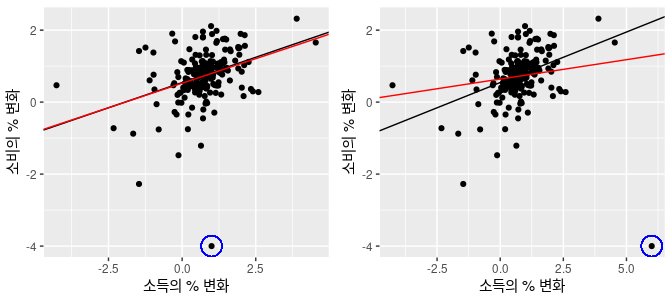

<br>

### 허위회귀(Spurious regression)

**대부분의 경우에는, 시계열 데이터에 “정상성(stationarity)이 나타나지 않습니다”; 즉, 시계열의 값이 일정한 평균이나 일정한 분산으로 변하지 않습니다.**

**예를 들어, 그림의 두 변수를 살펴봅시다. 둘 다 같은 방식으로 상향 추세이기 때문에 단순하게 관련 있는 것처럼 보입니다. 하지만, 호주의 승객 수송량은 기니의 쌀 생산량과 관련이 없습니다.**

( 추세가 있는 시계열 데이터는 관계 있는 것처럼 보일 수 있습니다.)

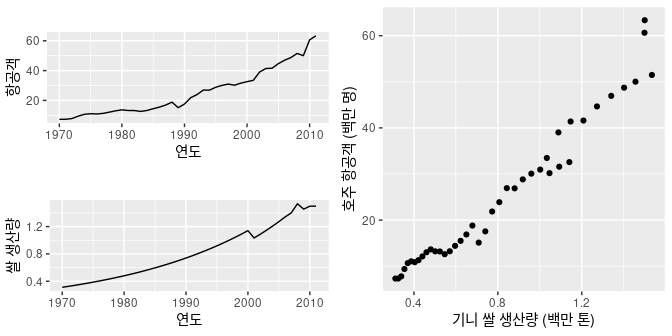

<br>

**정상성을 나타내지 않는 시계열을 회귀 분석하는 것은 허위회귀(spurious regression)로 이어질 수 있습니다. 높은 $R^2$와 높은 잔차(residual) 자기 상관은 허위회귀(spurious regression)라는 것을 나타내는 신호가 될 수 있습니다.**

허위 회귀의 사례는 그럴듯한 단기 예측값을 주는 것처럼 보일 수 있지만, 미래에도 계속 일반적으로 작동하지는 않을 것입니다.

In [28]:
aussies <- window(ausair, end=2011)
fit <- tslm(aussies ~ guinearice)
summary(fit)

Warning message in window.default(x, ...):
"'end' value not changed"



Call:
tslm(formula = aussies ~ guinearice)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6682 -1.4155  0.1918  1.5060  4.2157 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.7297     0.9026  -6.348  1.9e-07 ***
guinearice   37.4101     1.0487  35.672  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.334 on 38 degrees of freedom
Multiple R-squared:  0.971,	Adjusted R-squared:  0.9702 
F-statistic:  1272 on 1 and 38 DF,  p-value: < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 8

data:  Residuals from Linear regression model
LM test = 25.116, df = 8, p-value = 0.001485


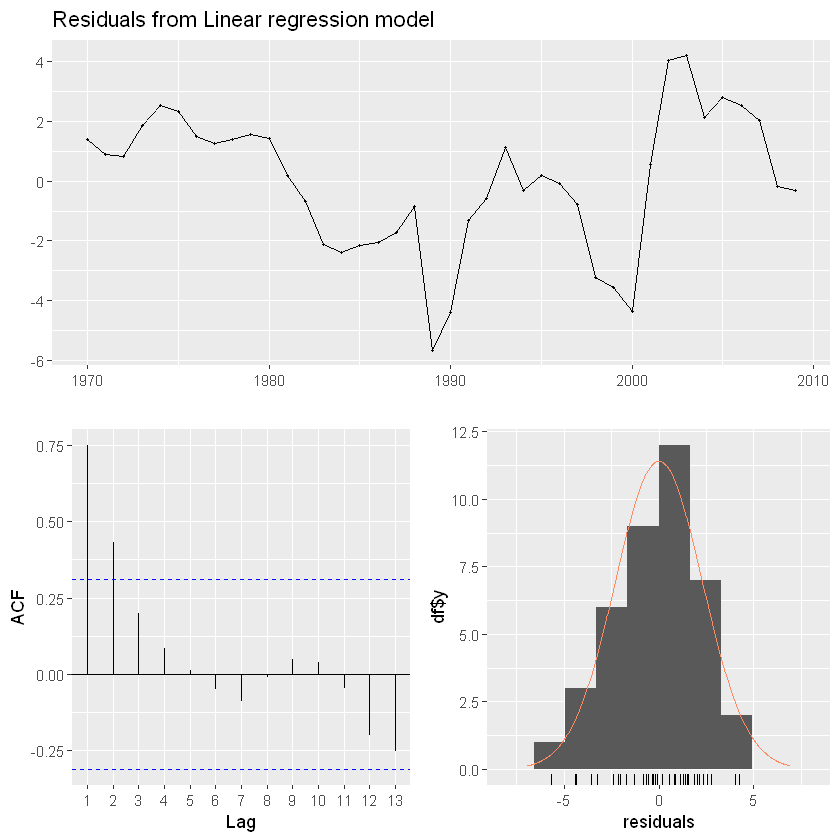

In [29]:
checkresiduals(fit)

<br>

## 05.04. 유용한 예측변수

시계열 데이터에 대해 회귀를 사용할 때 몇 가지 유용한 예측변수(predictor variable)가 있습니다. 이러한 예측변수(predictor variable)는 자주 나타납니다.

<br>

### 추세

시계열 데이터에 추세가 나타나는 것은 흔한 일입니다. 선형 추세는 다음과 같이 단순히 $x_{1,t}=t$를 예측변수(predictor variable)로 사용하여 모델링할 수 있습니다.

$$y_{t}= \beta_0+\beta_1t+\varepsilon_t,$$

여기에서 $t=1,\dots,T$입니다. `tslm()` 함수에서 trend 예측변수(predictor variable)를 사용하여 추세 변수를 정할 수 있습니다

<br>

### 가변수

지금까지는, 각 예측변수(predictor variable)가 숫자 값들로 나타나는 것을 가정했습니다. 하지만 예측변수(predictor variable)가 두 가지 값만 갖는(예를 들면, “예”와 “아니오”) 범주형(categorical) 변수일 때는 어떻겠습니까? 이러한 변수는 일별 판매량을 예측할 때 나타날 수 있습니다. 예를 들어, 날짜가 공휴일인지 아닌지 고려하고 싶은 경우를 생각해봅시다. 그러면 이 경우에 예측변수(predictor variable)는 공휴일이면 “예” 그렇지 않으면 “아니오” 값을 가질 것입니다.

이 상황도 다중 회귀 모델의 틀에서 1을 “예”로 0을 “아니오”로 갖는 “가변수(dummy variable)”를 만들어 다룰 수 있습니다. 모의 변수를 “지표 변수(indicator variable)”라고도 부릅니다.

가변수(dummy variable)는 데이터의 이상값(outlier)을 설명할 때도 사용할 수 있습니다. 이상값(outlier)을 생략하는 대신, 가변수(dummy variable)는 이러한 효과를 없앱니다. 이 경우에, 가변수는 이러한 관측치에 대해 1 이외에는 0입니다. 특별한 사건이 일어나는 경우도 한 가지 예가 됩니다. 예를 들어, 브라질에 방문하는 여행자를 예측하는 상황에서는, 2016년에 열린 리우 올림픽 효과를 고려할 필요가 있을 것입니다.

세 개 이상의 범주가 있을 때는, 변수를 (전체 범주의 수보다 1만큼 작은) 몇 가지 가변수(dummy variable)로 부호화할 수 있습니다. 인자 변수(factor variable)를 예측변수로 명시할 때, `tslm()`은 자동으로 이러한 경우를 다룰 것입니다. 보통은 관련 가변수(dummy variable)를 직접 만들 필요가 없습니다.

<br>

### 계절성 가변수

일별 데이터를 예측하고 있고 요일을 고려하고 싶다고 합시다. 그러면 다음과 같은 가변수(dummy variable)를 만들 수 있습니다.

**7개의 범주를 부호화하기 위해 6개의 가변수(dummy variable)만 필요하다는 것에 주목합시다. 이것은 모든 가변수를 0으로 둘 때, 절편이 7번째 범주(이 경우에는 일요일)를 잡아내고, 가변수를 모두 0으로 둘 때 명시적으로 정합니다.**

많은 입문자는 7번째 범주에 대해 7번째 가변수(dummy variable)를 넣으려고 할 것입니다. 이것 때문에 회귀가 실패할 것이라는 이유에서 이러한 실수를 “가변수 함정(dummy variable trap)”이라고 부릅니다. Y절편도 포함되었을 때 추정하기 위해 너무 많은 매개변수가 있는 것입니다. **일반적인 규칙은 범주보다 하나 적은 수의 가변수(dummy variable)를 사용하는 것입니다. 그래서 분기별 데이터에서는 3개의 가변수를, 월별 데이터에서는 11개의 가변수를, 일별 데이터에서는 6개의 가변수를 사용합니다.**

가변수와 관계된 각 계수는 생략된 범주에 관한 해당 범주의 효과를 나타냅니다. 위의 예제에서, 월요일과 관계된  $d_{1. t}$의 계수는 목표 예상변수(forecast variable)에 대해 일요일의 효과와 비교하여 월요일의 효과를 나타냅니다. 다음 예제는 호주 맥주 생산량의 분기별 계절성을 포착하는 추정된 가변수(dummy variable) 계수의 의미를 나타냅니다.

예측변수(predictor variable) season을 명시하면 `tslm()` 함수는 자동으로 이러한 상황을 다룹니다.

<br>

#### 예제: 호주 분기별 맥주 생산량

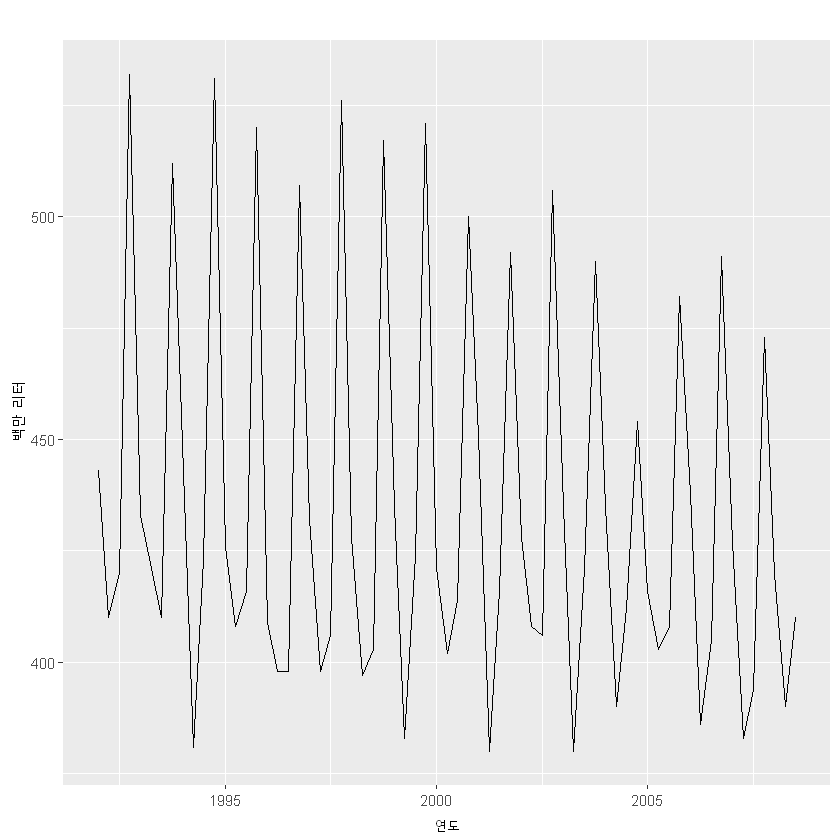

In [30]:
beer2 <- window(ausbeer, start=1992)
autoplot(beer2) + xlab("연도") + ylab("백만 리터")

선형 추세와 분기별 가변수(dummy variable)를 고려하는 회귀 모델로 이 데이터를 다음과 같이 모델링 할 수 있습니다.

$$y_{t} = \beta_{0} + \beta_{1} t + \beta_{2}d_{2,t} + \beta_3 d_{3,t} + \beta_4 d_{4,t} + \varepsilon_{t},$$

여기에서 $t$가 분기  $i$이면  $d_{i. t}=1$이고, 아니면 0입니다. 첫 번째 분기 변수는 생략되었기 때문에, 다른 분기와 관계된 계수는 첫 번째 분기와 다른 분기와의 차이를 나타냅니다

<br>

* (`trend`와 `season`은 객체가 아니라는 것에 주목하시길 바랍니다; 이러한 방식으로 명시할 때 `tslm()`에서 이것을 자동으로 생성합니다.)

In [31]:
fit.beer <- tslm(beer2 ~ trend + season)
summary(fit.beer)


Call:
tslm(formula = beer2 ~ trend + season)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.916  -7.877  -0.070   7.594  21.494 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 442.78341    3.98067 111.233  < 2e-16 ***
trend        -0.35886    0.07866  -4.562 2.45e-05 ***
season2     -35.40585    4.26869  -8.294 1.22e-11 ***
season3     -19.28229    4.27086  -4.515 2.89e-05 ***
season4      72.79268    4.33485  16.792  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.44 on 62 degrees of freedom
Multiple R-squared:  0.923,	Adjusted R-squared:  0.918 
F-statistic: 185.8 on 4 and 62 DF,  p-value: < 2.2e-16


<br>

분기별 -0.34 백만리터 값에 평균적인 하향 추세가 있습니다. 평균적으로, 2번째 분기는 생산량이 첫 번째 분기보다 34.7 백만리터 작고, 3번째 분기는 첫 번째 분기보다 17.8 백만리터 작고, 4번째 분기는 첫 번째 분기보다 72.8 백만리터 큽니다.

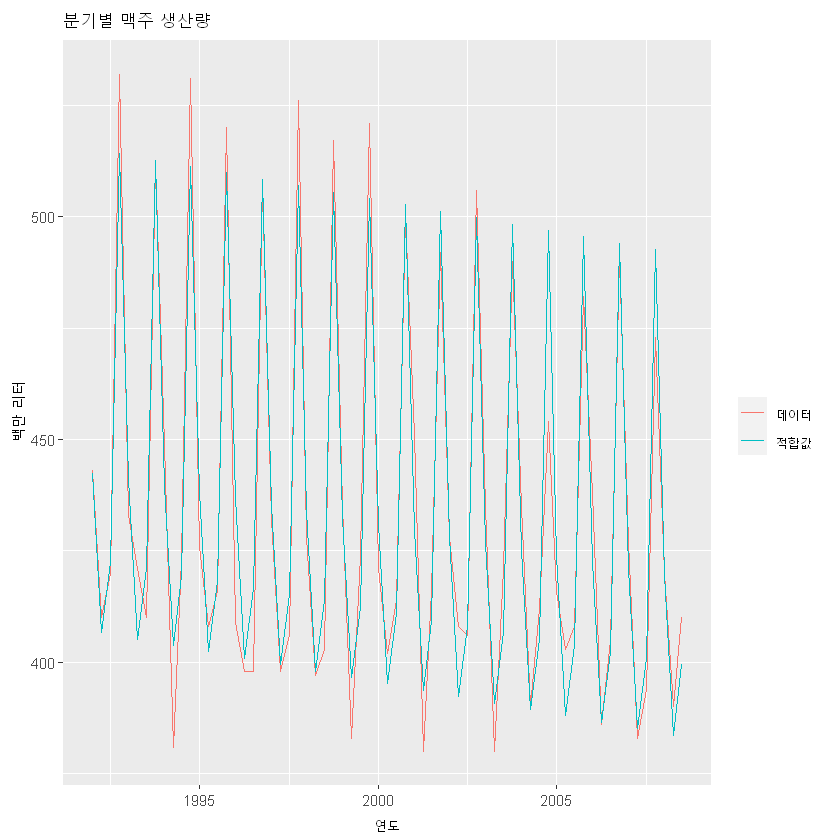

In [33]:
autoplot(beer2, series="데이터") +
  autolayer(fitted(fit.beer), series="적합값") +
  xlab("연도") + ylab("백만 리터") +
  guides(colour=guide_legend(title=" ")) +
  ggtitle("분기별 맥주 생산량")

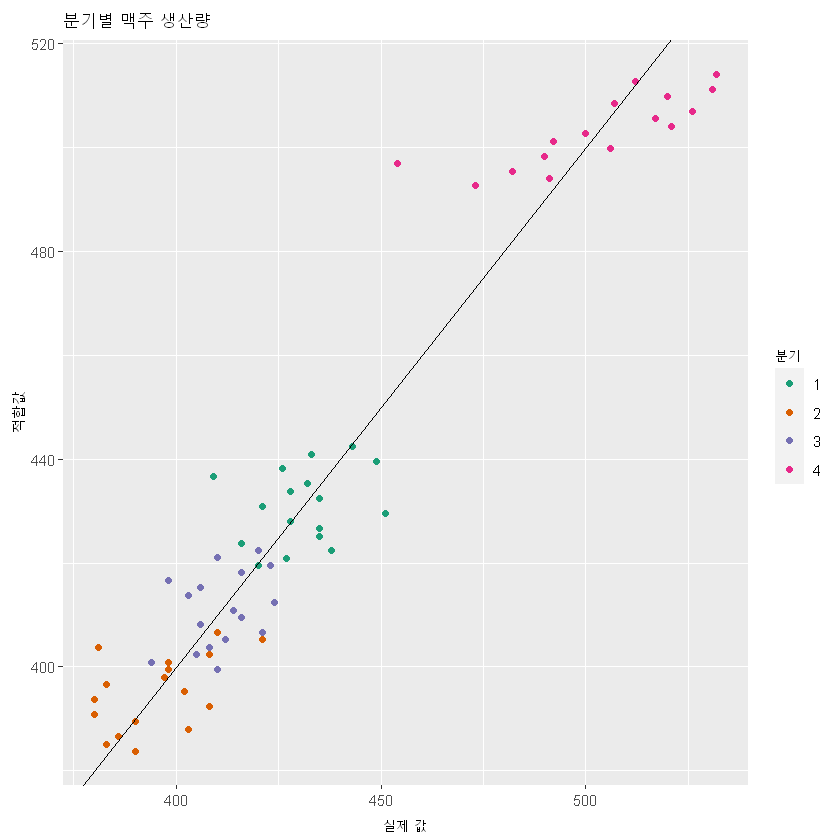

In [34]:
cbind(Data=beer2, Fitted=fitted(fit.beer)) %>%
  as.data.frame() %>%
  ggplot(aes(x = Data, y = Fitted,
             colour = as.factor(cycle(beer2)))) +
    geom_point() +
    ylab("적합값") + xlab("실제 값") +
    ggtitle("분기별 맥주 생산량") +
    scale_colour_brewer(palette="Dark2", name="분기") +
    geom_abline(intercept=0, slope=1)

<br>

### 개입 변수

**예측하려는 변수에 영향을 줄 수도 있는 개입(intervention)값을 모델링하는 것이 종종 필요합니다. 예를 들면, 경쟁자의 활동, 광고 지출, 산업 행동 등이 모두 영향을 미칠 수 있습니다.**

**효과가 한 주기만 지속될 때는, “스파이크(spike)” 변수를 사용합니다. 이것은 개입 기간에는 1로 두고 그 외에는 0으로 두는 가변수(dummy variable)입니다. 스파이크 변수는 이상값을 처리하기 위한 가변수와 같습니다.***

다른 개입(intervention)은 즉각적이고 영구적인 효과가 있습니다. 개입(intervention)이 수준 변화를 일으킬 때(즉, 시계열의 값이 개입 시점부터 갑자기 영구적으로 변하는 경우), “단계(step)” 변수를 사용합니다. 개입 전에는 단계 변수(step variable)를 0으로 두고 개입 이후에는 1로 둡니다.

영구적인 효과의 또 다른 형태는 기울기의 변화입니다. 여기에서 구간 선형 추세로 개입을 다룹니다; 개입 시점에서 추세가 구부러지기 때문에 따라서 추세는 비선형적입니다. 

<br>

### 거래일

매월 거래일의 날짜 수는 많이 변할 수 있고 판매량 데이터에 상당한 영향을 미칠 수 있습니다. 이러한 효과를 고려하기 위해, 각 월의 거래일 수를 예측변수로 포함시킬 수 있습니다.

월별이나 분기별 데이터에 대해, `bizdays()` 함수가 각 주기 안에 있는 거래일 수를 계산할 것입니다.

주마다 날짜 수가 다른 효과를 고려할 때는 다음과 같은 예측변수(predictor variable)가 들어갑니다:

$$\begin{align*}
  x_{1} &= \text{월의 월요일 수;} \\
  x_{2} &= \text{월의 화요일 수;} \\
        & \vdots \\
  x_{7} &= \text{월의 일요일 수.}
\end{align*}$$

<br>

### 분포된 시차 값

광고 지출을 예측변수(predictor variable)로 넣는 것은 종종 유용합니다. 하지만, 광고 효과는 실제 캠페인 기간보다 오래 갈 수 있기 때문에, 광고 지출의 시차값(lagged value)을 넣을 필요가 있습니다. 따라서 다음과 같은 예측변수(predictor variable)가 유용할 수 있습니다.

$$\begin{align*}
  x_{1} &= \text{이전 달의 광고 지출;} \\
  x_{2} &= \text{이전 2개월 동안 광고 지출;} \\
        & \vdots \\
  x_{m} &= \text{이전 $m$개월 동안 광고 지출.}
\end{align*}$$

시차가 증가함에 따라, 일반적으로 계수가 감소하도록 둡니다.

<br>

### 부활절

부활절은 매년 날짜가 다르고 효과가 며칠 동안 지속될 수 있기 때문에 대부분의 휴일과는 다릅니다. 이 경우에는, 특정 기간에 속하면 가변수(dummy variable)를 1로, 그 외에는 0으로 둘 수 있습니다.

월별 데이터에서, 부활절이 3월이면 3월에 가변수(dummy variable) 1을 두고 4월이면 4월에 가변수(dummy variable) 1을 두고, 3월에 시작하여 4월에 끝날 때는 가변수(dummy variable)를 월 사이에 비례하여 나눕니다.

`easter()` 함수가 가변수(dummy variable)를 계산할 것입니다.

<br>

### 푸리에 급수

계절성 가변수(seasonal dummy variable) 대신에, 긴 계절성 주기(seasonal period)에 대해서는 특별히, 푸리에 항(Fourier term)을 사용합니다. 장-밥티스트 푸리에(Jean-Baptiste Fourier)는 1700년대에 태어난 프랑스 수학자입니다. **사인과 코사인 항의 급수로 임의의 주기적 함수의 근사치를 낼 수 있다는 것을 보였습니다. 이러한 항을 계절성 패턴을 다룰 때 사용할 수 있습니다.**

$m$이 계절성 주기(seasonal period)라면, 처음 몇 개의 푸리에 항(Fourier term)은 다음과 같이 주어집니다.

$$x_{1,t} = \sin\left(\textstyle\frac{2\pi t}{m}\right),
  x_{2,t} = \cos\left(\textstyle\frac{2\pi t}{m}\right),
  x_{3,t} = \sin\left(\textstyle\frac{4\pi t}{m}\right),
  x_{4,t} = \cos\left(\textstyle\frac{4\pi t}{m}\right),
  x_{5,t} = \sin\left(\textstyle\frac{6\pi t}{m}\right),
  x_{6,t} = \cos\left(\textstyle\frac{6\pi t}{m}\right),$$
  
나머지도 이와 같습니다. **월별 계절성을 다루고 이러한 예측변수(predictor variable) 중에서 처음 11개를 사용한다면, 11개의 가변수(dummy variable)를 사용하여 정확하게 같은 예측값을 얻을 것입니다.**

**푸리에 항(Fourier term)이 있으면, 가변수(dummy variable)가 있는 경우에 필요한 예측변수(predictor variable)보다 (특히  $m$이 클 때) 종종 적은 수의 예측변수(predictor variable)를 사용한다는 것입니다.** 예를 들어, $m≈52$인 주별 데이터에 대해 이러한 장점이 유용할 수 있습니다. **짧은 계절성 주기를 다룰 때는(예를 들면, 분기별 데이터), 계절성 가변수(dummy variable)에 대해 푸리에 항(Fourier term)을 사용해도 딱히 좋은 점이 없습니다.**

R에서는 이러한 푸리에 항(Fourier term)을 `fourier()` 함수로 구합니니다. 예를 들어, 호주 맥주 데이터를 아래와 같이 모델링할 수 있습니다.

In [35]:
fourier.beer <- tslm(beer2 ~ trend + fourier(beer2, K=2))
summary(fourier.beer)


Call:
tslm(formula = beer2 ~ trend + fourier(beer2, K = 2))

Residuals:
    Min      1Q  Median      3Q     Max 
-42.916  -7.877  -0.070   7.594  21.494 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               447.30954    3.07654 145.394  < 2e-16 ***
trend                      -0.35886    0.07866  -4.562 2.45e-05 ***
fourier(beer2, K = 2)S1-4   9.64114    2.13543   4.515 2.89e-05 ***
fourier(beer2, K = 2)C1-4  54.09926    2.16707  24.964  < 2e-16 ***
fourier(beer2, K = 2)C2-4  14.16728    1.52070   9.316 2.14e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.44 on 62 degrees of freedom
Multiple R-squared:  0.923,	Adjusted R-squared:  0.918 
F-statistic: 185.8 on 4 and 62 DF,  p-value: < 2.2e-16


`fourier()`의 첫 번째 입력은 계절성 주기 $m$과 돌려줄 예측변수(predictor variable)의 길이를 찾을 수 있도록 합니다. 두 번째 입력 `K`으로 사인과 코사인 항을 몇 개 넣을 지 정합니다. **최대 $K=m/2$까지 정할 수 있습니다. 여기에서 $m$은 계절성 주기입니다. 여기에서 최대값을 사용했기 때문에, 얻은 결과가 계절성 가변수를 사용했을 때와 같습니다.**

**두 개의 푸리에 항($x_{1,t}$와 $x_{2,t}$)만 사용한다면, 계절성 패턴은 단순한 사인 파형으로 나타날 것입니다. 연이은 푸리에 항이 처음 두 푸리에 항의 조화를 나타내기 때문에 푸리에 항을 포함하는 회귀 모델을 보통 조화회귀(harmonic regression)라고 부릅니다.**

<br>

## 05.05. 예측변수 선택

가능한 예측변수(predictor variable)가 많이 있을 때는, 회귀 모델에서 사용할 가장 좋은 예측변수(predictor variable)를 선택하는 몇 가지 전략이 필요합니다.

**추천하지 않는 일반적인 접근 방식은 목표 예상변수(forecast variable)를 특정한 예측변수(predictor variable)에 대해 그래프로 나타내서 눈에 띄는 관계가 없는 경우에 버리는 것입니다. 특별히 다른 예측변수(predictor variable)의 효과가 설명되지 않았을 때 산점도(scatterplot)에서 관계를 보는 것이 항상 가능한 것은 아니기 때문에 이 방법은 유효하지 않습니다.**

**또한 유효하지 않은 또 다른 일반적인 접근 방식은 모든 예측변수(predictor variable)에 대해 다중 선형 회귀 분석을 하여 p-값들이 0.05보다 큰 모든 변수를 무시하는 것입니다. 먼저, 통계적인 유의미함이 항상 예측값을 나타내는 것은 아닙니다. 예측하는 것이 목표가 아닐 때도, 2개 이상의 예측변수(predictor variable)가 서로 관련되어있을 때 p-값들이 오해를 일으킬 수 있기 때문에 이것은 좋은 전략이 아닙니다**

대신에, 예측 정확도 측정량을 사용할 것입니다. 이 절에서는 5가지 측정량을 소개하겠습니다. `CV()` 함수를 사용하여 이러한 값을 계산할 수 있습니다. 여기에서는 미국 소비 데이터에 모델을 적용하였습니다:

<br>

이러한 값을 다른 모델로부터 얻은 관련된 값에 대해 비교합니다. CV, AIC, AICc, BIC 값을 가지고, 이러한 값이 가장 낮은 모델을 찾으려고 합니다. 조정된 $R^2$경우에는 이러한 값이 가장 높은 모델을 찾습니다.

In [36]:
CV(fit.consMR)

CV          AIC         AICc          BIC        AdjR2 
   0.1163477 -409.2980298 -408.8313631 -389.9113781    0.7485856

<br>

### 조정된 $R^2$

$R^2$값은 모델의 예측 능력을 측정하는 좋은 방법이 아닙니다. **이를 통해 모델이 과거 데이터를 얼마나 잘 설명하는지 측정할 수 있지만, 모델이 미래 데이터를 얼마나 잘 예측하는지를 측정할 수는 없습니다.**

**$R^2$는 “자유도(degree of freedom)”를 허용하지 않습니다. 어떤 변수를 추가하면 변수가 적합하지 않더라도 $R^2$의 값이 증가하는 경향이 있습니다.** 이러한 이유로 예측하는 사람들은 $R^2$를 모델이 좋은 예측값을 낼 지 판단하기 위해 사용하지 않아야 합니다. 과대적합(over-fitting)이 발생할 수 있기 때문입니다.

제곱 오차의 최소 합(SSE)을 내는 모델을 고르는 것도 위와 같은 개념입니다. 여기에서 SSE는 다음과 같은 양입니다.

$$\text{SSE} = \sum_{t=1}^T e_{t}^2.$$

**SSE를 최소화하는 것은 $R^2$를 최대화하는 것과 같고, 항상 변수가 가장 많은 모델을 선택할 것이므로 예측변수(predictor variable)를 선택하는 올바른 방법이 아닙니다.**

이러한 문제를 해결하기 위해 설계된 방법은 (“R-바-제곱(R-bar-squared)”이라고도 부르는) 조정된 $R^2$입니다.

$$\bar{R}^2 = 1-(1-R^2)\frac{T-1}{T-k-1},$$

여기에서 $T$는 관측값의 수이고 $k$는 예측변수(predictor variable)의 수입니다. **각각의 추가된 예측변수(predictor variable)에 따라 증가하지 않을 것이기 때문에 $R^2$가 개선된 것입니다.** 이 측정량을 사용하면 $\bar{R}^2$가 가장 큰 값을 갖는 것이 가장 좋은 모델이 될 것입니다. $\bar{R}^2$을 최대화하는 표준 오차 $\begin{equation}
  \hat{\sigma}_e=\sqrt{\frac{1}{T-k-1}\sum_{t=1}^{T}{e_t^2}}.
  \
\end{equation}$를 최소화하는 것과 같습니다.

너무 많은 예측변수(predictor variable)를 선택하는 부분이 잘못되는 경향이 있지만, $\bar{R}^2$를 최대화하는 것은 예측변수(predictor variable)를 선택하는 방법으로 적합합니다.

<br>

### 교차검증

회귀 모델에서 예측변수(predictor variable)를 선택하기 위해 고전적인 단일 관측치 제거법(leave-one-out) 교차검증을 사용하는 것도 가능합니다(Bergmeir, Hyndman, & Koo, 2018). 이 방법은 더 빠르면서 데이터를 더 효과적으로 사용할 수 있도록 합니다. 사용 과정은 다음과 같습니다:

1. 관측값  $t$를 데이터 모음에서 제거하고, 모델로 나머지 데이터를 맞춥니다. 그리고 생략한 관측값에 대한 오차($e_{t}^*=y_{t}-\hat{y}_{t}$)를 계산합니다. $\hat{y}_{t}$ 값을 추정할 때 $t$번째 관측값이 사용되지 않았기 때문에 잔차와 같지 않습니다.)

2. $t=1,\dots,T$에 대해 1번 과정을 반복합니다.

3. $e_{1}^*,\dots,e_{T}^*$ 로부터 MSE를 계산합니다. 이것을 CV라고 부르겠습니다.

이 방법은 시간이 오래걸리는 것처럼 보이지만, 한 모델을 전체 데이터 모음에 맞추는 것보다는 오래 걸리지 않도록 CV를 빠르게 계산하는 방법이 있습니다. 효율적으로 CV를 계산하는 식은 5.7 절에 있습니다. **이 기준에서 가장 좋은 모델은 CV가 가장 작은 모델입니다.**

<br>

### 아카이케의 정보 기준

밀접하게 관련된 기법은 아카이케의 정보 기준입니다(Akaike’s Information Criterion; AIC). 이 양의 정의는 다음과 같습니다.

$$\text{AIC} = T\log\left(\frac{\text{SSE}}{T}\right) + 2(k+2),$$

여기에서  $T$는 추정에 사용하는 관측값의 수이고 $k$ 는 모델에 있는 예측변수(predictor variable)의 수입니다. 서로 다른 컴퓨터 패키지 모두 다 선택하게 될 같은 모델을 내야 하긴 하지만, 패키지마다 AIC를 계산할 때 살짝 다른 정의를 사용합니다. 

**식의 $k+2$부분은 모델에  $k+2$개의 매개변수가 있기 때문에 나타나는 것입니다. 예측변수(predictor variable)에 대한 $k$개의 계수, 절편, 잔차에 대한 분산 때문에 $k+2$개입니다. 추정할 필요가 있는 매개변수의 수로 모델을 맞추는 작업(SSE)에 제한을 거는 것이 여기에서 기본적인 개념입니다.**

**AIC 값이 최소인 모델은 예측할 때 종종 가장 좋은 모델이 됩니다. 더 큰 $T$값들의 경우에, AIC를 최소화하는 것은 CV 값을 최소화하는 것과 같습니다.**

<br>


### 수정된 아카이케의 정보 기준

작은  $T$값들의 경우에, AIC는 예측변수(predictor variable)를 너무 많이 고르는 경향이 있어서 다음과 같이 편향을 수정한 AIC를 사용합시다.

$$\text{AIC}_{\text{c}} = \text{AIC} + \frac{2(k+2)(k+3)}{T-k-3}.$$

**$AIC$처럼, $AIC_c$도 최소화해야합니다.**


<br>

### 슈바르츠의 베이지안 정보 기준

관련된 측정량은 (종종 SBIC, BIC, 또는 SC라는 약자로 사용합니다) 슈바르츠(Schwarz)의 베이지안(Bayesian) 정보 기준입니다.

$$\text{BIC} = T\log\left(\frac{\text{SSE}}{T}\right) + (k+2)\log(T).$$

**AIC처럼, 가장 좋은 모델을 얻기 위해 BIC를 최소화해야합니다. BIC로 고른 모델은 AIC로 고른 것이나 더 적은 수의 항을 고려한 것과 같습니다. BIC가 AIC보다 매개변수의 수에 더 큰 제한을 주기 때문입니다.**

**큰 $T$ 값에 대해, BIC를 최소화하는 것은 $v = T[1-1/(\log(T)-1)]$일 때 $v$개 관측치 제거법 교차 검증하는 것과 비슷합니다.**

<br>

### 어떤 양을 사용해야 합니까?

$\bar{R}^2$이 널리 사용되고, 다른 양보다 더 오래되었지만, 이 양은 너무 많은 예측변수(predictor variable)를 고르는 경향이 있어서 예측 작업에 덜 적합합니다.

많은 통계학자는 진짜 근본 모델이 있을 때, 충분한 데이터가 있다면 BIC가 그 근본 모델을 고를 것이기 때문에 BIC를 사용합니다. 하지만, 실제로는 진정한 근본 모델이 있는 경우는 거의 없으며 진정한 근본 모델이 있더라도 (매개변수 추정값이 정확하지 않을 수 있기 때문에) 해당 모델을 선택하는 것이 반드시 가장 좋은 예측치를 낼 것이라고 보장하지 않습니다.

<br>

### 가장 좋은 부분집합 회귀

**가능한 경우, 모든 가능한 회귀 모델을 맞춰야 하고, 다룬 측정량 중 하나에 근거하여 가장 좋은 모델을 골라야합니다. 이것을 “가장 좋은 부분집합(Best subset)” 회귀 또는 “모든 가능한 부분집합(all possible subset)” 회귀라고 합니다.**

<br>

### 단계적 회귀 

많은 수의 예측변수(predictor variable)가 있는 경우에는, 모든 가능한 모델을 맞출 수는 없습니다. 예를 들면, 40개의 예측변수(predictor variable)가 있는 경우에는 $2^{40} >$  1조 개의 모델이 있을 수 있습니다! 결과적으로, 다룰 모델의 개수를 제한하는 전략이 필요합니다.

<br>

후진 단계적 회귀(backwards stepwise regression)는 꽤 잘 들어맞는 접근 방식입니다:

- 모든 잠재적인 예측변수(predictor variable)를 포함하는 모델부터 시작합니다.
- 한 번에 하나의 예측변수(predictor variable)를 제거합니다. 이렇게 하여 예측 정확도가 나아지면 모델을 유지합니다.
- 더 나아지지 않을 때까지 반복합니다.

잠재적인 예측변수(predictor variable)가 너무 많으면, 후진 단계적 회귀(backwards stepwise regression)가 작동하지 않을 것이고 대신에 전진 단계적 회귀(forward stepwise regression)를 사용할 수 있습니다. 이 절차는 절편만 포함하는 모델에서 시작합니다. 예측변수(predictor variable)는 한 번에 하나씩 추가하며, 예측 정확도를 높이는 모델은 유지합니다. 더 나아지지 않을 때까지 이 과정을 반복합니다.

대안으로, 후진(backward)이나 전진(forward)에 대해, 시작 모델은 잠재적인 예측변수(predictor variable)의 부분집합을 포함하는 것일 수 있습니다. 이 경우에, 추가 단계가 포함되어야 합니다. 후진 절차에 대해, 각 단계에서 예측변수(predictor variable)를 넣는 것도 고려해야하며, 전진(forward) 절차에 대해, 예측변수(predictor variable)를 빼는 것도 고려해야 합니다. 이것을 혼합 절차라고 부릅니다.

어떠한 단계별 접근 방식이 가장 좋은 모델로 이어진다는 보장이 없지만 거의 항상 좋은 모델로 이어진다는 것을 깨닫는 것이 중요합니다. 자세한 내용은 James, Witten, Hastie, & Tibshirani (2014) 을 참조하시길 바랍니다.

<br>

### 예측변수를 고른 후의 추측을 주의합시다

이 책에서는 예측변수(predictor variable)의 통계 추론을 다루지 않습니다(즉, 각 예측변수와 관련된 p-값을 살피는 것). 예측변수(predictor variable)의 통계적인 유의미함을 살펴보고 싶다면, 예측변수(predictor variable)를 먼저 고르는 일을 포함하는 어떠한 절차도 p-값에 깔린 가정을 무효화합니다. 모델을 예측용으로 사용할 때 예측변수(predictor variable)를 고르는 절차는 유용합니다만, 예측변수(predictor variable)에 대한 어떤 목표 예상변수(forecast variable)의 효과를 살펴보고 싶을 때는 그렇지 않습니다.